# Optimising engagement with Hacker News Data 

*Induvial & extracurricular project.*

**Aim**: to analyse the most effective time for maximising user engagement through social media post timing. With the goal of supporting brands marketing social media posts.
This will be done by leveraging the Hacker News dataset (https://www.kaggle.com/datasets/hacker-news/hacker-news-posts ).

**Technical objectives**:
- Utilise Object-Oriented Programming (OOP)
- Work with strings
- Implement the "datetime" package to manipulate raw data into useful data structures


- Do Ask HN or Show HN receive more comments on average?
- Do posts created at a certain time receive more comments on average?

In [25]:
# Importing neccessary packages
from statistics import mean
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
# Reading the file in as a list of lists
opened_file = open('hacker_news.csv')
from csv import reader
read_file = reader(opened_file)
hn = list(read_file)

In [3]:
# Removing the headers from the dataset and assigning it to a variable called "headers". 
# The new list of lists without the headers is "hn"
headers = hn[0]
print(headers)

hn = hn[1:]

['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']


### Filtering the data

Only the post starting with "Ask HN" or "Show HN" will be selected to analyse since they represent those with most user engagement.

The string method "startswith" will be utilise to find these posts.

In [20]:
# Creating the lists to store each post in a category: either "Ask", "Show" or "Other"
ask_posts = []
show_posts = []
other_posts = []

for row in hn:
    title = (row[1].lower())
    if title.startswith('ask hn'):
        ask_posts.append(row)
    elif title.startswith('show hn'):
        show_posts.append(row)
    else:
        other_posts.append(row)

print("Number of Ask posts: ", len(ask_posts))
print("Number of Show posts: ", len(show_posts))
print("Number of Other posts: ", len(other_posts))

Number of Ask posts:  1744
Number of Show posts:  1162
Number of Other posts:  17194


From printing the length of each list we can see that "other" posts is the largest list with 17194 posts, followed by "ask" posts with 1744, and lastly "Show" posts with 1162.

### Initial statistical analysis
The average comments in "Ask" and "Show" post is found to determine which type of post receives more comments on average.

In [19]:
# Finding the average number of comments in "Ask" posts
total_ask_comments = 0
list_col4 = []
for row in ask_posts:
    num_comments = row[4]
    list_col4.append(int(num_comments))
    total_ask_comments += int(num_comments)
print("Total Ask comments: ", total_ask_comments)
avg_ask_comments = mean(list_col4)
print("Average number of comments in Ask posts: ", avg_ask_comments)

Total Ask comments:  24483
Average number of comments in Ask posts:  14.038417431192661


In [18]:
# Finding the average number of comments in "Show" posts
total_show_comments = 0
list_col4_show = []
for row in show_posts:
    num_comments = row[4]
    list_col4_show.append(int(num_comments))
    total_show_comments += int(num_comments)
print("Total Show comments: ",total_show_comments)
avg_show_comments = mean(list_col4_show)
print("Average number of comments in Show posts: ", avg_show_comments)

Total Show comments:  11988
Average number of comments in Show posts:  10.31669535283993


"Ask" posts receive more comments on average with 14 average comments per post compared to the 10 comments per post for "show" posts. Since "Ask" posts are more likely to receive comments, the rest of the analysis will focus on these posts.

### Analysis on the link between the time a post is created and the amount of comments it receives

Firstly, the number of "Ask" posts created in each hour of the day, along with the number of comments received will be calculated.
Secondly, the avergae number of comments the posts recieve by hour created will be calculated.

In [22]:
# Iterating over "Ask" posts and appending to "result_list" a list with two elements. 
# The first column is the time the post was created which is in the 6th column of "ask_posts".
# The second column is the number of comments of the post, which is the 4th column of "ask_posts".

result_list = []

for row in ask_posts:
    created_at = row[6]
    num_comments = row[4]
    result_list.append([created_at, int(num_comments)])

counts_by_hour = {} # contains the number of "ask" posts created during each hour of the day
comments_by_hour = {} # contains the corresponding number of comments "ask" posts created at each hour received.

for row in result_list:
    date = row[0]
    num_comments = row[1]
    # Using the datetime.strptime() method to parse the date and create a datetime object.
    time = dt.datetime.strptime(date, "%m/%d/%Y %H:%M")
    hour = time.strftime("%H")
    if hour not in counts_by_hour:
        counts_by_hour[hour] = 1
        comments_by_hour[hour] = int(num_comments)
    elif hour in counts_by_hour:
        counts_by_hour[hour] += 1
        comments_by_hour[hour] += int(num_comments)
print("Counts by hour: ", counts_by_hour)
print("Comments by hour: ", comments_by_hour)

Counts by hour:  {'09': 45, '13': 85, '10': 59, '14': 107, '16': 108, '23': 68, '12': 73, '17': 100, '15': 116, '21': 109, '20': 80, '02': 58, '18': 109, '03': 54, '05': 46, '19': 110, '01': 60, '22': 71, '08': 48, '04': 47, '00': 55, '06': 44, '07': 34, '11': 58}
Comments by hour:  {'09': 251, '13': 1253, '10': 793, '14': 1416, '16': 1814, '23': 543, '12': 687, '17': 1146, '15': 4477, '21': 1745, '20': 1722, '02': 1381, '18': 1439, '03': 421, '05': 464, '19': 1188, '01': 683, '22': 479, '08': 492, '04': 337, '00': 447, '06': 397, '07': 267, '11': 641}


In [38]:
# Calculating the average number of comments for posts created during each hour of the day.
comments = []
for hour in comments_by_hour:
    comments.append([hour, comments_by_hour[hour] / counts_by_hour[hour]])

# Sorting  the list of lists from highest to lowest for easier analysis
swap_avg_by_hour = []
for row in comments:
    avg = row[1]
    hr = row[0]
    swap_avg_by_hour.append([avg, hr])
sorted_swap = sorted(swap_avg_by_hour, reverse=True)

# Printing the top 5 hours for "Ask" posts comments
print("Top 5 hours for Ask posts Comments (US time)")
for avg, hr in sorted_swap[:5]:
    print(
        "{}: {:.2f} average comments per post".format(
            dt.datetime.strptime(hr, "%H").strftime("%H:%M"),avg
        )
    )

#Printing the 3 times of day with the least "Ask" post comments
sorted_swap_asc = sorted(swap_avg_by_hour, reverse=False)
print("Least 5 hours for Ask posts Comments (US time)")
for avg, hr in sorted_swap_asc[:5]:
    print(
        "{}: {:.2f} average comments per post".format(
            dt.datetime.strptime(hr, "%H").strftime("%H:%M"),avg
        )
    )

Top 5 hours for Ask posts Comments (US time)
15:00: 38.59 average comments per post
02:00: 23.81 average comments per post
20:00: 21.52 average comments per post
16:00: 16.80 average comments per post
21:00: 16.01 average comments per post
Least 3 hours for Ask posts Comments (US time)
09:00: 5.58 average comments per post
22:00: 6.75 average comments per post
04:00: 7.17 average comments per post
03:00: 7.80 average comments per post
07:00: 7.85 average comments per post


This dataset is in US Easter time which is 5 hours behind Uk time. Therefore the top 5 times to do a "Ask" post are: 
- 8pm
- 7am
- 1am
- 9pm
- 2am.

The 5 hours with the least number of comments are:
- 2pm
- 3am
- 9am
- 8am
- Noon

Below the avergae number of comments per post by hour is plotted in a bar chart and allows for easy inspection of the peaks and fluctuations of comments in "ask" posts. The hour has been converted to UK time.

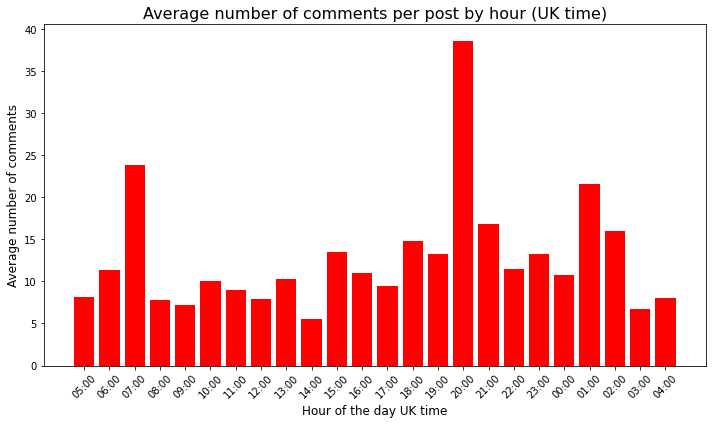

In [31]:
# Sorting by hour in chronological order
sorted_swap_by_hour = sorted(sorted_swap, key=lambda x: int(x[1]))  

# Extracting hours and average comments from sorted_swap_by_hour to plot them.
hours = []
avg_comments = []
for avg, hr in sorted_swap_by_hour:
    # Using datetime.strptime to convert the hour into a readable format
    us_hour = dt.datetime.strptime(str(hr), "%H")
    # Adding 5 hours to convert to UK time
    uk_hour = us_hour + dt.timedelta(hours=5)
    formatted_uk_hour = uk_hour.strftime("%H:%M")
    hours.append(formatted_uk_hour)
    avg_comments.append(avg)

# PLotting a bar graph using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(hours, avg_comments, color='red')
plt.title('Average number of comments per post by hour (UK time)', fontsize=16)
plt.xlabel('Hour of the day UK time', fontsize=12)
plt.ylabel('Average number of comments', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Conclusion:

The analysis indicates that user engagement, measured by the number of comments, peaks at 8pm UK time. Secondary peaks occur at 7am and 1am. These engagement patterns align with typical 9 to 5 work schedules, as users are most active before and after traditional working hours. On the other hand, the hours with the least average number of comments are at 2pm, followed by 3am and 9am, which further supports the correlation between engagement and work schedule. 

These results show the peak and low engagement periods, valuable for timing content releases and maximising interaction with brands marketing content.